# Data Analytics @ Le Wagon

Let's start

In [3]:
2+3

5

## Data Types

In [4]:
# numeric

In [5]:
# integer
type(2)

int

In [6]:
# float
type(3.14)

float

In [7]:
 # string
type("London")

str

In [8]:
# Boolean
True 

True

In [9]:
False

False

## Boolean Algebra

In [10]:
True and True

True

In [11]:
True or False

True

In [12]:
False or False

False

## Variables

In [13]:
city = "London"

In [14]:
city

'London'

## Fonctions 

In [15]:
len(city)

6

In [16]:
# Syntax 1 - function_name(object)
len('london')

6

In [18]:
name = "anne"

In [20]:
# Syntax 2 - object.function_name(arguments)
name.capitalize()

'Anne'

In [23]:
name.endswith('e')

True

In [24]:
name.endswith('s')

False

## Data sourcing

### Data files
- Structured data (.csv, .json, .xml, .xlsx)
- Unstructured data (.pdf, .doc, .txt, .xlsx)
- Binary or proprietary (How can I open it?)

### Data sources
- SQL Database
- Google BigQuery or Data Warehouse provider (SQL works too)
- API (Application Programming Interface) .json
- Webscraping

#### API
You need the requests package

In [100]:
# import requests
# url = 'https://...'
# response = requests.get(url)   # GET HTTP request
# print(response.status_code     # Should be 200 if OK
# data = response.json()
#TODO: Load 'data' in a Pandas DataFrame

#### Webscraping

You need to download the Beautiful Soup package and some front-end development knowledge (DOM, CSS selectors, etc...)

In [101]:
# import requests
# from bs4 import BeautifulSoup

# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')

#You now can query the 'soup' object
# soup.title.string
# soup.find('h1')
# soup.find_all('a')
#etc...

### Kaggle: New York City Airbnb Open Data

### Data sets available
- Google Data Search
- Kaggle

## Pandas

In [1]:
import pandas as pd

In [2]:
ls nyc-airbnb-data

AB_NYC_2019.csv


In [3]:
listings_df = pd.read_csv('nyc-airbnb-data/AB_NYC_2019.csv')

### Get sense of data 

In [4]:
# Tuple
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
listings_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
listings_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Cleaning Data

In [7]:
listings_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
columns_to_drop = ['id',"host_name","last_review"]
# axis = remove in columns
# inplace = True if we want to modify the original
listings_df.drop(columns_to_drop, axis='columns', inplace = True)

In [9]:
listings_df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
listings_df.fillna({'reviews_per_month' : 0}, inplace = True)

In [11]:
listings_df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
# Filter by 1 column
listings_df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [13]:
# Filter by multiple column
listings_df[['name','neighbourhood_group', 'price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,70
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,40
48892,Sunny Studio at Historical Neighborhood,Manhattan,115
48893,43rd St. Time Square-cozy single bed,Manhattan,55


In [14]:
# Filter by rows
listings_df[0:5]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
# Filter by rows and columns
listings_df[0:5][['name','neighbourhood_group', 'price']]

,name,neighbourhood_group,price
0,Clean & quiet apt home by the park,Brooklyn,149
1,Skylit Midtown Castle,Manhattan,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,150
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80


### Boolean Indexing

In [16]:
listings_df['price'] < 100

0        False
1        False
2        False
3         True
4         True
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: price, Length: 48895, dtype: bool

In [17]:
listings_df[listings_df['price'] < 100]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.00,2,163
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [18]:
affordable_df = listings_df[listings_df['price'] < 100]

In [19]:
affordable_df.shape

(21877, 13)

# Questions Time

### What are the 10 most reviewed listings? 

In [23]:
affordable_df.nlargest(10,'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
1271,My Little Guest Room in Flushing,2680820,Queens,Flushing,40.75578,-73.81948,Private room,55,1,474,5.53,3,332


### What are the NY neighborhood groups with listings?

In [25]:
listings_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
listings_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Follow-up: How many listings per neighborhood group? 

In [29]:
listings_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### What are the Top 10 neighborhoods with Airbnb listings?

In [21]:
listings_df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [37]:
listings_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

### Plotting

<AxesSubplot:>

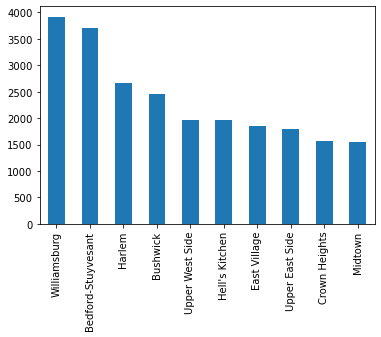

In [48]:
# with matplotlib, calling plot(kind='bar') directly on the data frame
listings_df['neighbourhood'].value_counts().head(10).plot(kind='bar')

In [51]:
pip install seaborn

     |████████████████████████████████| 283 kB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

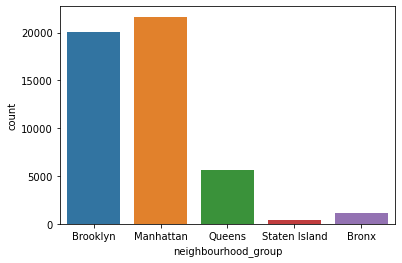

In [54]:
# with Seaborn, no need for a value_counts(), we can just use a countplot (unordered)
sns.countplot(data = listings_df, x = 'neighbourhood_group')

<AxesSubplot:xlabel='room_type', ylabel='count'>

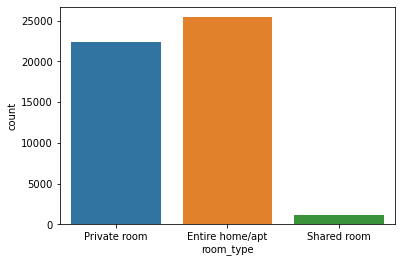

In [55]:
sns.countplot(data = listings_df, x = 'room_type')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

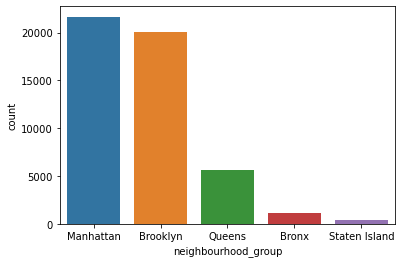

In [59]:
# with Seaborn, using ordered Countplot
order = listings_df['neighbourhood_group'].value_counts().index
sns.countplot (data = listings_df, x = 'neighbourhood_group', order = order)

### What's the influence of the neighborhood on the room type?

In [60]:
listings_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

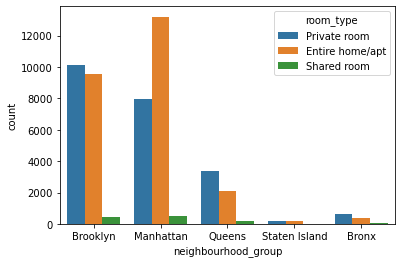

In [62]:
sns.countplot (data = listings_df, x='neighbourhood_group', hue='room_type')

### What is the distribution of flat prices?

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

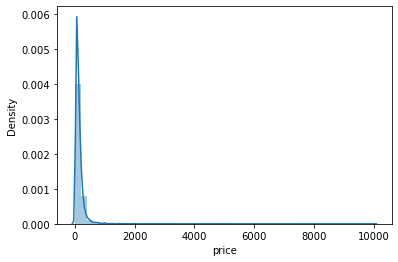

In [70]:
# with Seaborn, using a Distplot
sns.distplot(listings_df['price'])

In [71]:
affordable_df = listings_df[listings_df['price'] < 500]

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

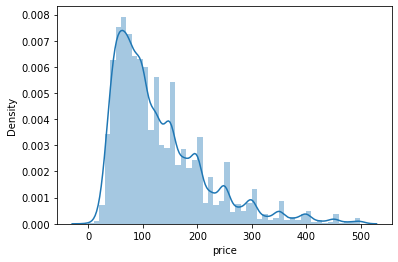

In [73]:
sns.distplot(affordable_df['price'])

In [76]:
listings_df['price'].mean()

152.7206871868289

In [77]:
affordable_df['price'].mean()

130.0539026437264

### What is the distribution of flat prices based on the Neighbourhood Group?

In [81]:
from matplotlib import pyplot as plt

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

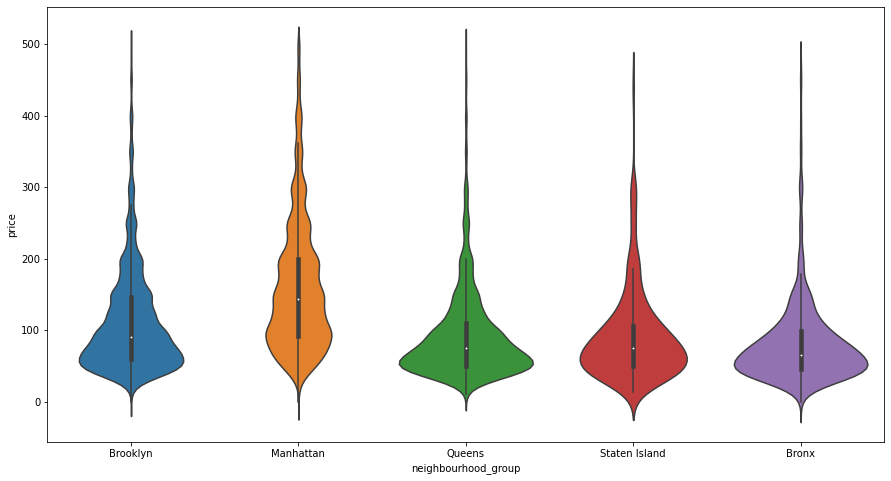

In [87]:
# With Pyplot, using a Violinplot
plt.figure(figsize=(15,8))
sns.violinplot(data = affordable_df, x = 'neighbourhood_group', y="price")

### Can we plot the listings on a map?

In [88]:
# with Matplotlib, we can use a Scatterplot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

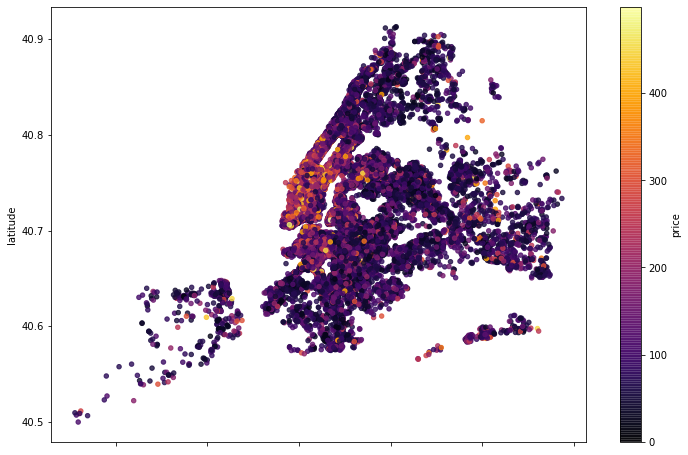

In [91]:
affordable_df.plot(
    kind='scatter',
    x= 'longitude',
    y= 'latitude',
    c= 'price',
    cmap = 'inferno',
    colorbar = True,
    alpha = 0.8,
    figsize = (12,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

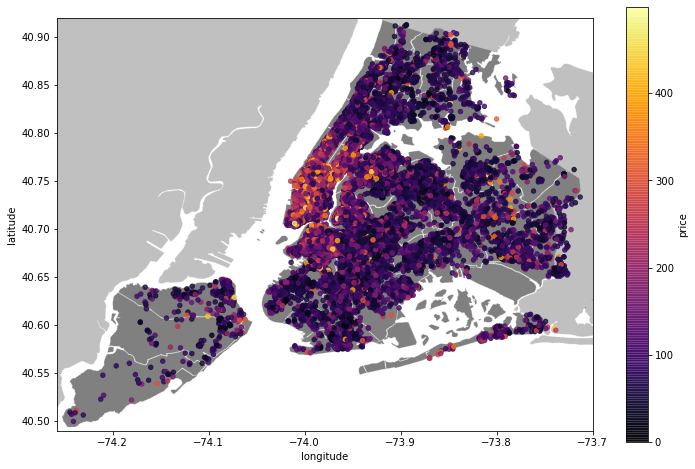

In [98]:
import urllib
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
plt.imshow(plt.imread(i,'.png'), zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
affordable_df.plot(
    ax = ax,
    zorder = 1,
    kind='scatter',
    x= 'longitude',
    y= 'latitude',
    c= 'price',
    cmap = 'inferno',
    colorbar = True,
    alpha = 0.8,
    figsize = (12,8))

# Learn More

### Marchine Learning

Do your first regressions, classifications and clustering with sckit-learn package